# Monthly Averages Coding Challenge - SOLUTION

### Instructions: 

Using the 'avocados.csv' file, complete the following tasks:

1. Load the csv into a DataFrame  


2. Create a new DataFrame of the **monthly averages** of the 'AveragePrice' column. Your new DataFrame should have two columns - 'date' and 'average_price' with one price listed per month which represents an average of all entries from that month.  

  
3. Plot the monthly average prices in a line plot.

### Example of new DataFrame:

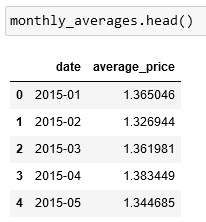

### Example of line plot:

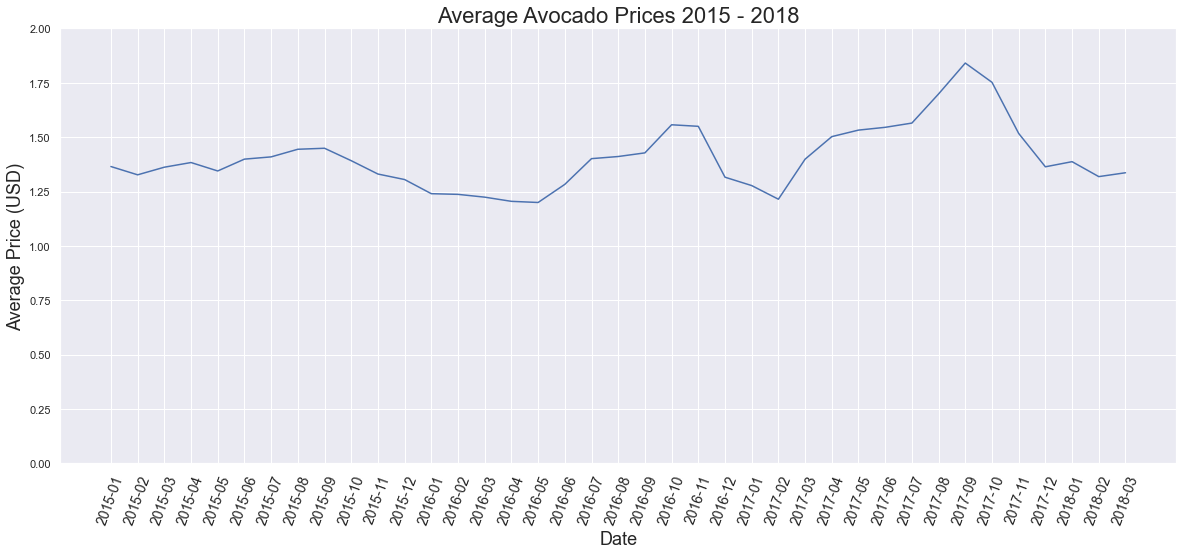

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [2]:
df = pd.read_csv('avocado.csv', index_col=False)

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
monthly_averages = pd.DataFrame(data=df.groupby(pd.PeriodIndex(df['Date'], freq='M'))['AveragePrice'].mean())

In [19]:
monthly_averages.reset_index(inplace=True)

In [21]:
monthly_averages.Date = monthly_averages.Date.astype(str)

In [48]:
monthly_averages.rename(columns={'Date':'date', 'AveragePrice':'average_price'}, inplace=True)

In [51]:
monthly_averages.head()

,date,average_price
0,2015-01,1.365046
1,2015-02,1.326944
2,2015-03,1.361981
3,2015-04,1.383449
4,2015-05,1.344685


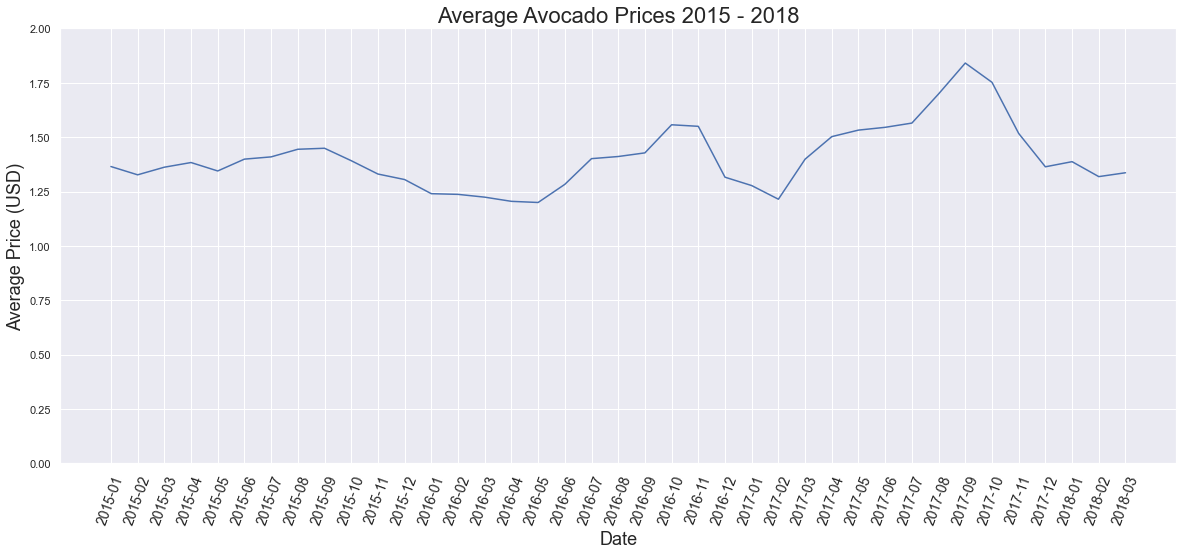

In [50]:
plt.figure(figsize=(20,8))

plt.xticks(rotation=70, fontsize=14)

sns.lineplot(data=monthly_averages, x='date', y='average_price')

plt.ylim(0,2)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price (USD)', fontsize=18)

plt.title('Average Avocado Prices 2015 - 2018', fontsize=22);